## Overview of the data during the month of October

The month of October was the focus on the customer behaviour study. 

In [14]:
# Importing october events

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

oct_events = pd.read_csv("october_events.csv")

# graph
oct_events = oct_events.iloc[1: , :]



In [27]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 16

<AxesSubplot:ylabel='event'>

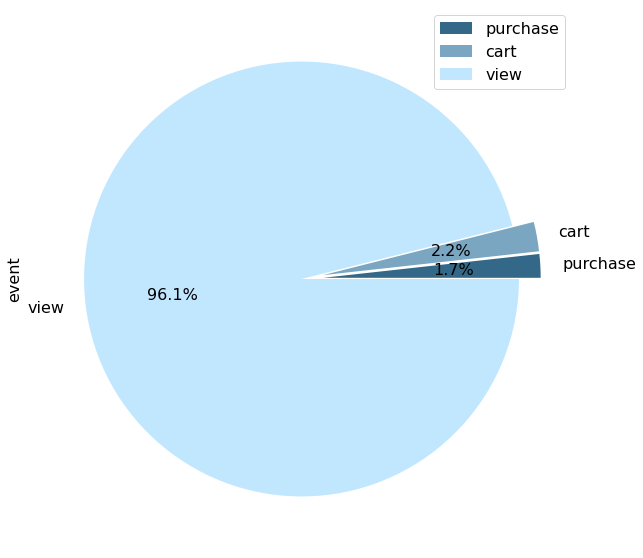

In [29]:

oct_events.plot.pie(y = 'event', autopct='%1.1f%%', 
                    legend=True,
                    figsize=(12,10),
                    labels=oct_events['event_type'].values,
                    explode=(0.1,0.1,0),
                    colors = ['#346888','#7aa6c2','#c1e7ff'])
                    #textprops={'fontsize': 18})


Thereafter, the distribution of the brand purchases was explored

In [172]:
brand_count = pd.read_csv("brand_code_count_purchase.csv")
brand_count.mean()


C:\Users\RozinaLucy.Myoya\AppData\Local\Temp\2\ipykernel_22028\440814712.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  brand_count.mean()


brandcount    377.288403
dtype: float64

In [178]:
top_brands = brand_count[brand_count['brandcount']>5000]

In [179]:
len(top_brands)

16

Text(0.5, 0, 'Brand name')

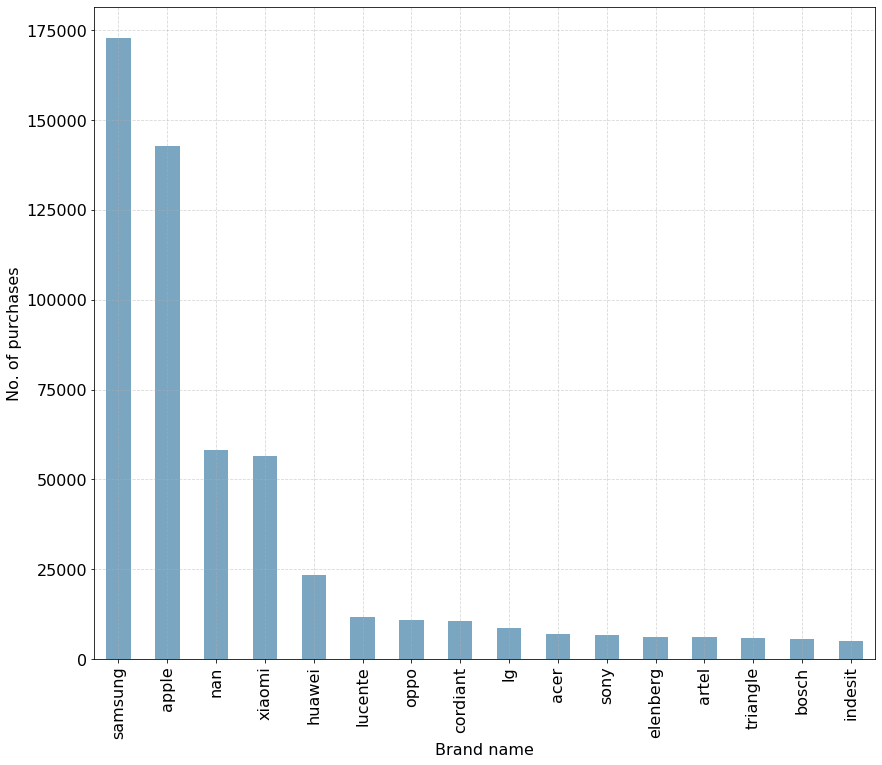

In [180]:
top_brands.plot.bar(x = 'brand', y='brandcount', figsize=(14,12), grid=True, legend=False, color='#7aa6c2')
plt.grid('on', linestyle='--', alpha=0.5)
plt.ylabel('No. of purchases')
plt.xlabel('Brand name')


Based on the results in the table, the brand names indicate that this website predominently trades electronics , given that the most popular identifiable brands include "samsung", "apple", "xiaomi" etc. We can further investigate this assumption by ploting the distribution of category types popular on the site. 

In [181]:
category_count= pd.read_csv("category_code_count_purchase.csv")
category_count

,category_code,categorycount
0,electronics.smartphone,338018
1,NaN,173425
2,electronics.audio.headphone,30503
3,electronics.video.tv,21565
4,electronics.clocks,17906
...,...,...
116,apparel.skirt,4
117,apparel.jumper,2
118,apparel.shorts,2
119,apparel.jacket,1


Text(0.5, 0, 'Category Type')

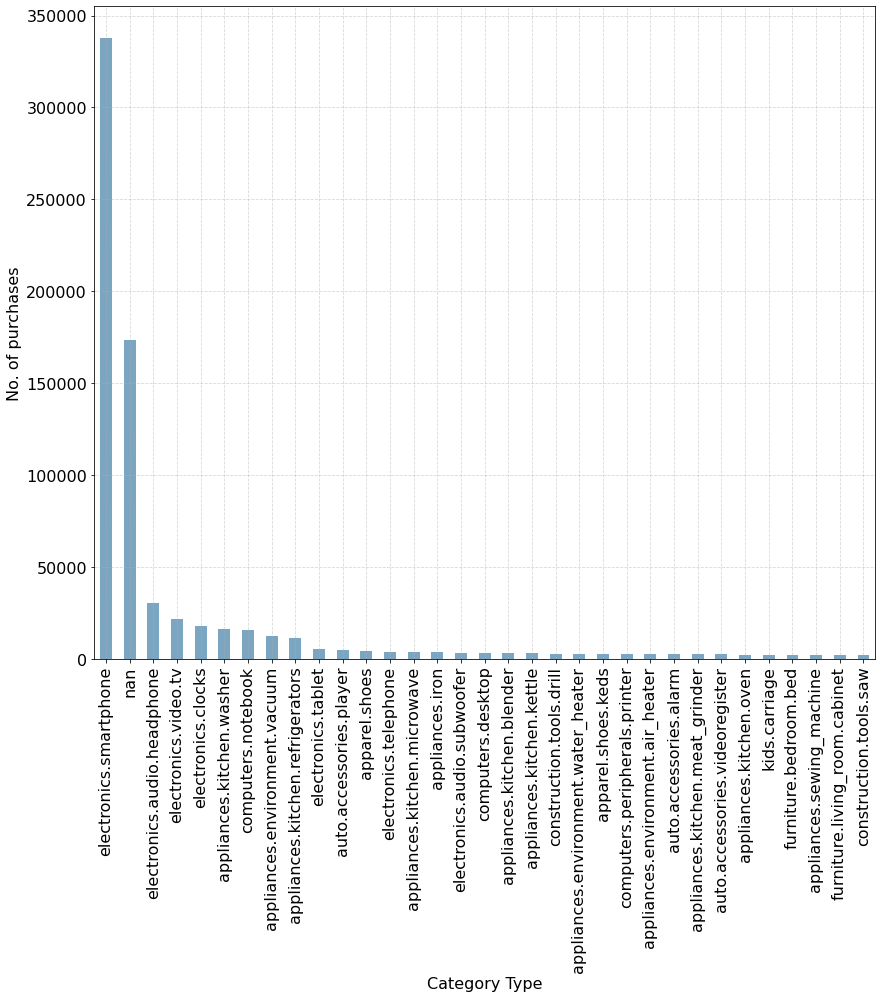

In [186]:
top_categories = category_count[category_count['categorycount']>1500]
top_categories.plot.bar(x = 'category_code', y='categorycount', figsize=(14,12), grid=True, legend=False, color='#7aa6c2')
plt.grid('on', linestyle='--', alpha=0.5)
plt.ylabel('No. of purchases')
plt.xlabel('Category Type')

Based on this distribution, the most popular categories on the site can be split into 5 distinct classes: electronics (including computer related purchases), appliances, apparel, furniture and accessories. The pie chart below presents the percentage distribution of these classes.

In [ ]:
top_categories['category_code'] = top_categories['category_code'].str.split(".")

In [188]:
top_categories=top_categories.dropna()

In [ ]:
top_categories['class'] = 0
for i in range(len(top_categories['category_code'])):
    for c in top_categories['category_code'].values[i]:
        if 'electronics' == c or 'computers' == c:
            top_categories['class'].iloc[[i]] = 'electronics'
        if 'appliances' == c:
            top_categories['class'].iloc[[i]] = 'appliances'
        if 'apparel' == c:
            top_categories['class'].iloc[[i]] = 'apparel'
        if 'furniture' == c:
            top_categories['class'].iloc[[i]] = 'furniture'
        if 'accessories' == c:
            top_categories['class'].iloc[[i]] = 'accessories'

In [191]:
top_categories.drop(top_categories.loc[top_categories['class']==0].index, inplace=True)
top_categories

C:\Users\RozinaLucy.Myoya\AppData\Local\Temp\2\ipykernel_22028\2403629148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_categories.drop(top_categories.loc[top_categories['class']==0].index, inplace=True)


,category_code,categorycount,class
0,"[electronics, smartphone]",338018,electronics
2,"[electronics, audio, headphone]",30503,electronics
3,"[electronics, video, tv]",21565,electronics
4,"[electronics, clocks]",17906,electronics
5,"[appliances, kitchen, washer]",16148,appliances
6,"[computers, notebook]",15590,electronics
7,"[appliances, environment, vacuum]",12378,appliances
8,"[appliances, kitchen, refrigerators]",11218,appliances
9,"[electronics, tablet]",5603,electronics
10,"[auto, accessories, player]",4647,accessories


In [192]:
category_summary = pd.DataFrame(top_categories['class'].value_counts())
category_summary

,class
appliances,12
electronics,10
accessories,3
apparel,2
furniture,2


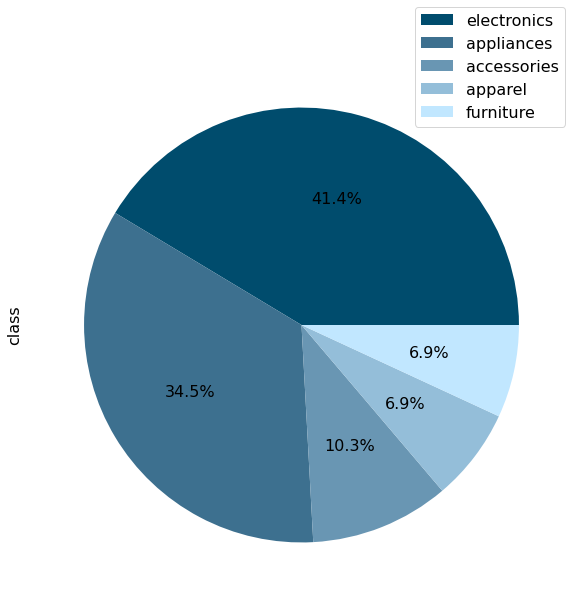

In [193]:
category_summary.plot.pie(y = 'class', autopct='%1.1f%%', 
                    legend=True,
                    figsize=(12,10),
                    colors = ['#004c6d','#3d708f','#6996b3','#94bed9','#c1e7ff'],
                    labels=None)
                    #textprops={'fontsize': 18})
plt.legend(labels= top_categories['class'].unique(),bbox_to_anchor=(1,1.1),loc="upper right")

Based on the results from the chart, the highest revenue source for the site is electronics then followed closely with appliances

## Investigating customer behaviour

Understanding customer behaviour is the first step in learning how to influence this behaviour and turn it into increase revenue (i.e., increase the number of purchase events). The fist step would be to determine the traffic within the site in terms of daily peak hours and weakly peak hours. 

In [278]:
users = pd.read_csv('user_id_count.csv')
users['user_id'].nunique()

729700

In [279]:
users_purchased = pd.read_csv('user_id_count_purchases.csv')
users_purchased['user_id'].nunique()

31600

In [281]:
total_visitors = users['user_id'].nunique() + users_purchased['user_id'].nunique()
perc_purchase = users_purchased['user_id'].nunique() / total_visitors
perc_purchase

0.04150794693287797

In [265]:
purchase_time_user = pd.read_csv('time_user_purchase.csv')
purchase_time_user['event'] = 'purchase'
purchase_time_user

,event_time,user_id,event
0,2019-10-01 00:02:14 UTC,543272936,purchase
1,2019-10-01 00:04:37 UTC,551377651,purchase
2,2019-10-01 00:06:02 UTC,514591159,purchase
3,2019-10-01 00:07:07 UTC,555332717,purchase
4,2019-10-01 00:09:26 UTC,524601178,purchase
...,...,...,...
735490,2019-10-31 23:55:13 UTC,516604399,purchase
735491,2019-10-31 23:55:21 UTC,514622109,purchase
735492,2019-10-31 23:56:03 UTC,512717356,purchase
735493,2019-10-31 23:56:53 UTC,533892594,purchase


In [245]:
purchase_time_user['time_stamp']= pd.to_datetime(purchase_time_user['event_time'])

In [246]:
purchase_time_user.drop(columns = ['event_time'],inplace=True)
purchase_users= purchase_time_user[['time_stamp', 'user_id', 'event']]
purchase_users

,time_stamp,user_id,event
0,2019-10-01 00:02:14+00:00,543272936,purchase
1,2019-10-01 00:04:37+00:00,551377651,purchase
2,2019-10-01 00:06:02+00:00,514591159,purchase
3,2019-10-01 00:07:07+00:00,555332717,purchase
4,2019-10-01 00:09:26+00:00,524601178,purchase
...,...,...,...
735490,2019-10-31 23:55:13+00:00,516604399,purchase
735491,2019-10-31 23:55:21+00:00,514622109,purchase
735492,2019-10-31 23:56:03+00:00,512717356,purchase
735493,2019-10-31 23:56:53+00:00,533892594,purchase


In [247]:
purchase_users_daily = purchase_users
purchase_users_daily['time_stamp'] = purchase_users_daily['time_stamp'].apply(lambda s: str(s)[0:10])
purchase_users_daily

,time_stamp,user_id,event
0,2019-10-01,543272936,purchase
1,2019-10-01,551377651,purchase
2,2019-10-01,514591159,purchase
3,2019-10-01,555332717,purchase
4,2019-10-01,524601178,purchase
...,...,...,...
735490,2019-10-31,516604399,purchase
735491,2019-10-31,514622109,purchase
735492,2019-10-31,512717356,purchase
735493,2019-10-31,533892594,purchase


In [260]:
purchase_visitor_by_date = purchase_users_daily.drop_duplicates().groupby(['time_stamp'])['user_id'].agg(['count']).sort_values(by=['time_stamp'], ascending=True)
purchase_visitor_by_date

,count
time_stamp,
2019-10-01,13965
2019-10-02,13785
2019-10-03,13618
2019-10-04,19072
2019-10-05,16605
2019-10-06,15977
2019-10-07,15307
2019-10-08,16462
2019-10-09,16309


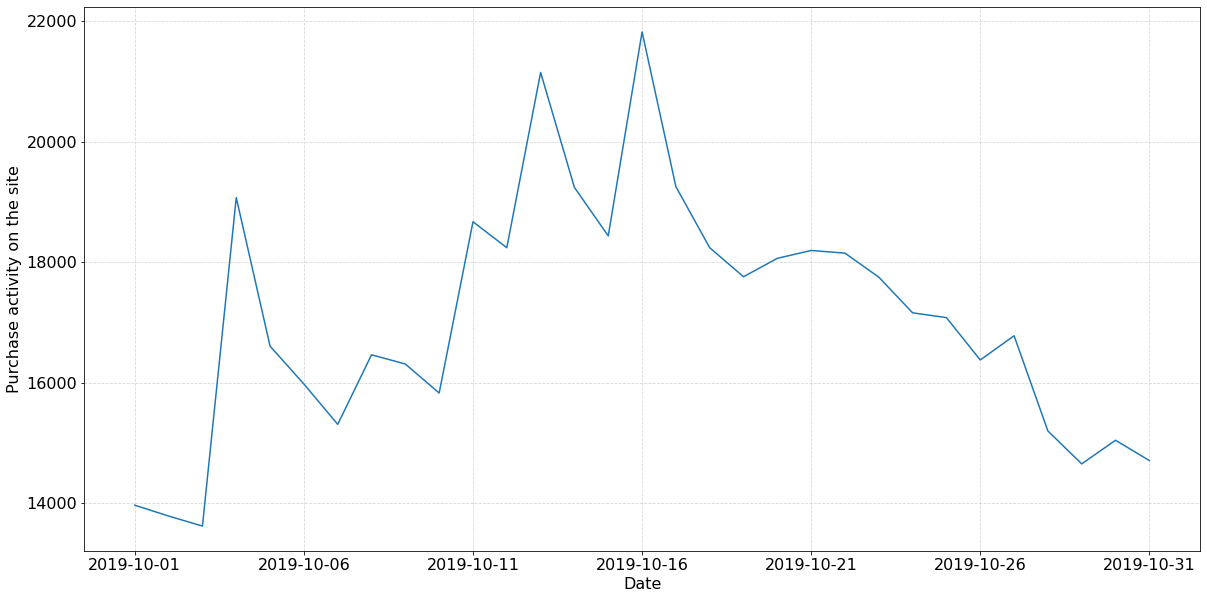

In [272]:

purchase_visitor_by_date.plot.line(figsize=(20,10),
                                  legend=False)
plt.xlabel('Date')
plt.ylabel('Purchase activity on the site')
plt.grid('on', linestyle='--', alpha=0.5)

The graph shows that purchases picked mid month

In [287]:
# how much to users spend on the site in general 

user_price = pd.read_csv('user_brand_purchase sample.csv')
user_price

,user_brand_purchase.user_id,user_brand_purchase.brand,user_brand_purchase.price
0,541312140,shiseido,35.79
1,554748717,aqua,33.20
2,519107250,NaN,543.10
3,550050854,lenovo,251.74
4,535871217,apple,1081.98
...,...,...,...
365094,512498596,jvc,46.33
365095,547184834,xiaomi,185.70
365096,553072239,lucente,390.74
365097,555549292,jbl,115.81


In [301]:
user_price['user_brand_purchase.price'] = user_price['user_brand_purchase.price'].astype(int)
grouped_users_price = user_price.groupby("user_brand_purchase.user_id")['user_brand_purchase.price'].apply(lambda price: sum(price))
grouped_users_price

user_brand_purchase.user_id
306441847     656
321655812    1625
332550649     228
348609428     666
351866718     327
             ... 
555549204     332
555549278      60
555549288     332
555549292     115
555549293     166
Name: user_brand_purchase.price, Length: 67434, dtype: int64

In [335]:
grouped_users_price.tolist()

[656,
 1625,
 228,
 666,
 327,
 885,
 810,
 210,
 194,
 686,
 20,
 911,
 283,
 51,
 188,
 43,
 147,
 162,
 83,
 160,
 407,
 174,
 82,
 295,
 128,
 812,
 1574,
 1924,
 880,
 76,
 178,
 6,
 102,
 514,
 167,
 331,
 26,
 955,
 1053,
 2570,
 12,
 3229,
 155,
 191,
 389,
 824,
 46,
 2427,
 73,
 308,
 1103,
 2976,
 2105,
 368,
 408,
 1567,
 514,
 371,
 19,
 126,
 257,
 313,
 30,
 133,
 297,
 154,
 1339,
 126,
 38,
 119,
 501,
 1029,
 1541,
 526,
 1475,
 1361,
 384,
 1822,
 835,
 58,
 1238,
 18,
 180,
 117,
 463,
 509,
 1646,
 738,
 848,
 5953,
 25,
 286,
 97,
 537,
 930,
 858,
 632,
 440,
 52,
 4238,
 302,
 732,
 41,
 639,
 2214,
 453,
 1343,
 97,
 197,
 89,
 1082,
 231,
 86,
 376,
 51,
 306,
 138,
 174,
 138,
 597,
 738,
 130,
 125,
 195,
 1218,
 1286,
 1012,
 237,
 106,
 6,
 607,
 1338,
 34,
 95,
 124,
 61,
 29,
 101,
 102,
 1342,
 36,
 6,
 3194,
 13,
 77,
 2920,
 19363,
 179,
 213,
 34,
 112,
 284,
 130,
 2689,
 5536,
 12,
 141,
 6108,
 464,
 734,
 253,
 572,
 14573,
 282,
 574,
 1260,
 10

In [331]:
grouped_users_price[:1,][:0,]

Series([], Name: user_brand_purchase.price, dtype: int64)

In [336]:
df_grouped_users_price = pd.DataFrame(grouped_users_price)
df_grouped_users_price['price'] = grouped_users_price.tolist()

df_grouped_users_price

,user_brand_purchase.price,price
user_brand_purchase.user_id,,
306441847,656,656
321655812,1625,1625
332550649,228,228
348609428,666,666
351866718,327,327
...,...,...
555549204,332,332
555549278,60,60
555549288,332,332


In [315]:
df_grouped_users_price.iloc[:,0].values

array([ 656, 1625,  228, ...,  332,  115,  166], dtype=int64)

In [337]:
top_spenders = df_grouped_users_price[df_grouped_users_price.iloc[:,0]>1500]
#top_spenders.rename(columns = {'user_brand_purchase.user_id':'user_id', 'user_brand_purchase.price':'price'}, inplace = True)
top_spenders

,user_brand_purchase.price,price
user_brand_purchase.user_id,,
321655812,1625,1625
414824833,1574,1574
415555114,1924,1924
429063384,2570,2570
429716458,3229,3229
...,...,...
555548058,2047,2047
555548122,2891,2891
555548183,3663,3663


In [341]:
spenders_df = pd.DataFrame()
spenders_df['user_id'] = top_spenders['user_brand_purchase.user_id']
spenders_df['price'] = top_spenders['price']
spenders_df

KeyError: 'user_brand_purchase.user_id'

In [340]:

top_spenders.plot.bar(x = df_grouped_users_price.iloc[:,0].values, y='price', figsize=(14,12), grid=True, legend=False, color='#7aa6c2')
plt.grid('on', linestyle='--', alpha=0.5)
plt.ylabel('Money spent on purchases ($)')
plt.xlabel('User_id')

KeyError: "None of [Int64Index([ 656, 1625,  228,  666,  327,  885,  810,  210,  194,  686,\n            ...\n             390,  965,  166, 1184,  166,  332,   60,  332,  115,  166],\n           dtype='int64', length=67434)] are in the [columns]"

In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep

class EventCount(MRJob):
    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_event,
                   reducer = self.reducer_count_events)
        ]
    def mapper_get_event(self, _, line):
        (event_time, event_type, category_code, brand, price, user_id) = line.split('/t')
        yield event_type, 1
    
    def reducer_count_events(self, key, values):
        yield key, sum(values)
        
if __name__ == '__main__':
    EventCount.run()


In [ ]:
from pyspark import SparkConf, SparkContext

def loadEvent():
    event_type = {}
    with open("october.csv") as oct:
        for line in oct:
            event = line.split('/t')
            event_type[int(event[0])] = event[1]
    return event_type

def parseInput(line):
    fields = line.split()
    return(int(fields[1]), 1.0)

event_type = loadEvent()
lines = sc.textFile("hdfs://user/maria_dev/october.txt")
eventCount = lines.map(parseInput)

